# P105-Su23-ProblemSet02 problems

## Rigid body rotation

### Learning objectives
In this question you will:

- analytically derive Euler's equations and study the behaviour near equilibria
- numerically solve the equations and compare to theoretical expectations
- simulate the free rotation of real objects and compare to empirical evidence


Let us study the rotation of a rigid body. Recall the definitions of the angular velocity vector $\boldsymbol\omega$, the moment of inertia tensor $I_{ij} = \int d^3\mathbf{r}\:\rho(\mathbf r)(r^2\delta_{ij}-r_ir_j)$, and angular momentum vector $\mathbf L=I\cdot \boldsymbol\omega$. Recall that the torque determines the rate of change of angular momentum $\boldsymbol\tau = \dot{\mathbf L}$.

## Euler Equations in Python

### 1a. 

Let's analyse the system in the body-frame in which the moment of inertia is diagonal, i.e. $$I=\begin{pmatrix}I_1&0&0\\0&I_2&0\\0&0&I_3\end{pmatrix}.$$ Let's call the basis vectors $\mathbf e_1$, $\mathbf e_2$, and $\mathbf e_3$. Don't forget that $\mathbf e_i$ change with time. In this basis, the angular momentum is $\mathbf L = I_1 \omega_1\mathbf e_1 + I_2\omega_2\mathbf e_2 + I_3\omega_3\mathbf e_3$. Assuming there are no torques, derive the Euler equations,\begin{align}I_1\dot\omega_1&=(I_2-I_3)\omega_2\omega_3,\\I_2\dot\omega_2&=(I_3-I_1)\omega_1\omega_3,\\I_3\dot\omega_3&=(I_1-I_2)\omega_1\omega_2.\end{align} (Hint: for a rigid body the moment of inertia tensor is constant in the body frame. Remember than the rate of change of any vector $\mathbf v$ rotationg with angular velocity $\boldsymbol\omega$ is given by $\dot{\mathbf v}=\boldsymbol\omega\times\mathbf v$.)

Write your answer here

### 1b. 

Fill in the following function to numerically integrate the Euler equations. No need to use a sophisticated integrator; we can use small step sizes if required.

In [ ]:
import numpy as np

def euler(omega0, I1, I2, I3, times):
    """
    (All quantities in body frame, in diagonal basis of inertia tensor)
    omega0: initial angular velocity, array of shape (3,) 
    I1,I2,I3: principal moments of inertia, scalars
    times: array of times at which to find omega, array of shape (N,)
    returns: omegas at times, array of shape (3,N)
    """
    omegas = #compute omegas
    return omegas

### 1c. 

What happens when $\boldsymbol\omega_0$ is aligned with one of the principal moments of inertia? Check that your function `euler()` returns what you expect in this situation. 

Write your answer here

### 1d. 

What happens when $I_1=I_2=I_3$? Again, check that your function makes sense.

Write your answer here

### 1e. 

Show that if two of the principal moments are equal, then $\omega$ precesses around the third principal moment. (Think of a spinning coin without gravity, or an American football.) Find the angular velocity of precession $\omega_p=\frac{2\pi}{T_p}$ in terms of the parameters already defined.

Write your answer here

### 1f. 

Use your solution `euler()` to estimate the precession rate $\omega_p$ of an object with $I_1=2$, $I=1$, and $\boldsymbol\omega = (1,1,1)^T$ (e.g. you can find the first non-zero time when $|\boldsymbol\omega-\boldsymbol\omega_0|<\epsilon$ for some $\epsilon\ll1$). Compare with theoretical expectations.

In [ ]:
#Write your answer here

### 1g. 

Fill in the following function that analytically solves Euler's equations for $I_2=I_3\equiv I$ using the precession that you calculated above.

In [ ]:
def precession(omega0, I1, I, times):
    """
    (All quantities in body frame, in diagonal basis of inertia tensor)
    omega0: initial angular velocity, array of shape (3,) 
    I1,I: principal moments of inertia (I2=I3=I), scalars
    times: array of times at which to find omega, array of shape (N,)
    returns: omegas at times, array of shape (N,3)
    """
    omegas = #compute omegas
    return omegas

## Kinetic Energy & Trajectories

### 1h. 

Recall than in torque-free motion the energy is given by the kinetic energy, $T=\frac{1}{2}\boldsymbol\omega\cdot I\cdot\boldsymbol\omega.$ Fill in the following function that calculates the energy from a given $\boldsymbol\omega$ and $I$ in the preferred body frame.

In [ ]:
def energy(omega,I1,I2,I3):
    """
    omega: angular velocity vector, shape (3,)
    I1,I2,I3: principal moments of inertia, scalars
    returns: energy, scalar
    """
    return #energy

### 1i. 

In $\boldsymbol\omega$-space, what shape do the energy contours take? Recall that since energy is conserved, $\boldsymbol\omega$ is constrained to be on such surfaces.

The following function is supposed to plot multiple trajectories overlaid on the allowed energy surface. It is almost complete, except that it currently plots the energy surface as the unit sphere regardless of input. Complete the function. (Hint: you can obtain the energy surfaces by re-scaling the dimensions of a sphere.)

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#use %matplotlib inline if notebook doesn't work..

def plot_trajectories(trajectories,I1,I2,I3):
    """
    trajectories: array of shape (M,N,3) containing M omega vectors at N time-steps
                (all omega vectors assumed to be at the same energy)
    I1, I2, I3: principal moments of inertia
    returns nothing, plots trajectories as lines in 3d plot overlaid on energy 
                ellipsoid (using energy of first omega vector of first trajectory)
    """
    N = 20
    theta,phi = np.linspace(0,np.pi,N),np.linspace(0,2*np.pi,2*N)
    theta, phi = np.meshgrid(theta, phi)
    
    T = energy(trajectories[0,0],I1,I2,I3)

    #Hint: rescale variables (multiply x,y,z with a factor each)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)

    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    ax.plot_surface(x,y,z,alpha=.2,facecolors=[["w"]*N]*2*N)
    ax.set_xlabel("$\omega_1$")
    ax.set_ylabel("$\omega_2$")
    ax.set_zlabel("$\omega_3$")
    
    bound = np.amax([x,y,z])
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)
    
    for omegas in trajectories:
        ax.plot(*omegas.T)

In [ ]:
#Write your answer here

### 1j. 

The following cell plots the trajectories of some randomly chosen initial $\boldsymbol\omega$s. You can use your visualisation of energy and your implementation of `euler()` to test each other. Once your energy visualisation is consistent with your plotted trajectories, try increasing the step size. What happens? What does this tell you about the integrator you are using?

In [ ]:
def get_random_initials(I1,I2,I3,energy=1,n=30):
    """
    I1,I2,I3: principal moments of inertia, scalars
    energy: energy of initial states
    n: number of points to sample
    returns: n randomly chosen omega vectors with given energy
    """
    randoms = np.zeros((n,3))
    for i in range(n): #sample uniformly from sphere using rejection
        x = np.random.rand(3)*2-1
        r = np.sum(x**2)
        while r > 1:
            x = np.random.rand(3)*2-1
            r = np.sum(x**2)
        randoms[i] = x/r**.5
    randoms[:,0] = randoms[:,0]*(2*energy/I1)**.5
    randoms[:,1] = randoms[:,1]*(2*energy/I2)**.5
    randoms[:,2] = randoms[:,2]*(2*energy/I3)**.5
    return randoms

I = 2,1,0.5
omega0s = get_random_initials(*I)
times = np.linspace(0,20,10000)
traj = np.array([euler(o,*I,times) for o in omega0s])
plot_trajectories(traj,*I)

### 1k. 

Use these visualisation techniques to compare your analytical solution `precession()` with your numerical solution `euler()` for $I_2=I_3=I$. Plot both $I_1<I$ and $I_1>I$.

In [ ]:
#Write your answer here

## Precession of Earth's Axis

### 1l. 

The Earth's axis of rotation precesses with a period of about 430 days (not to be confused with the precession of 26,000 years around its orbital rotation axis, which is caused mostly by tidal/gravitational forces). This precession is known as _Chandler wobble_. Assuming the Earth is a rigid oblate spherioid (i.e. $I_1>I$), estimate the fractional asymmetry of the principal moments of inertia (i.e. $\frac{I-I_1}{I}$). From this, assuming the Earth's density is a scaled spherically symmetric distribution (like how you created the energy ellipsoid surfaces), calculate its _ellipticity_ (ratio of major to minor axes).

Write your answer here

### 1m. 

Real data for the Chandler wobble is shown below. 

<div style="width: 500px;margin: auto" align="center">
    <img src="chandler wobble.gif">
    Source: <a href="http://www.michaelmandeville.com/earthmonitor/polarmotion/plots/chandler_wobble_plots.htm">Michael Mandeville</a>
</div>

Does this match the prediction from Euler's equations? If not, then are Euler's euqations wrong, or do some of our assumptions (which ones?) about the Earth break down?

Write your answer here

### 1n. 

Now consider the general case, $I_1>I_2>I_3$ (in the approriate basis). We know that the principal moments of inertia are fixed points (equilibria) for $\boldsymbol\omega$. However, are they stable? Analyse the motion very close to the principal moments (i.e. linearise the differential equation). Which of these equilibria are stable? Are there any other equilibria? Does this agree with the visualisation you made earlier?

Write your answer here

## Precession 

### 1o. 

Consider the following video of  the rotation of a free rigid body taken on the ISS. Note that the initial angular velocity vector is very close to a principal moment of inertia. (Hint: Try throwing a coin in the air. Does it display this behaviour? How about a deck of cards? Estimate the principal axes and moments of inertia of a deck of cards, and try spinning it around each of these axes while throwing it into the air. Which axes display simple rotation and which display this flipping behaviour?)

In [16]:
from IPython.display import Video
Video("Dancing T-handle in zero-g.mp4",width=700)

What can you conclude about the values of the principal moments of inertia, and specifically the moment that it starts off close to?

Write your answer here

### 1p. 

Consider the following crude approximation of the T-junction:

<IPython.core.display.Javascript object>


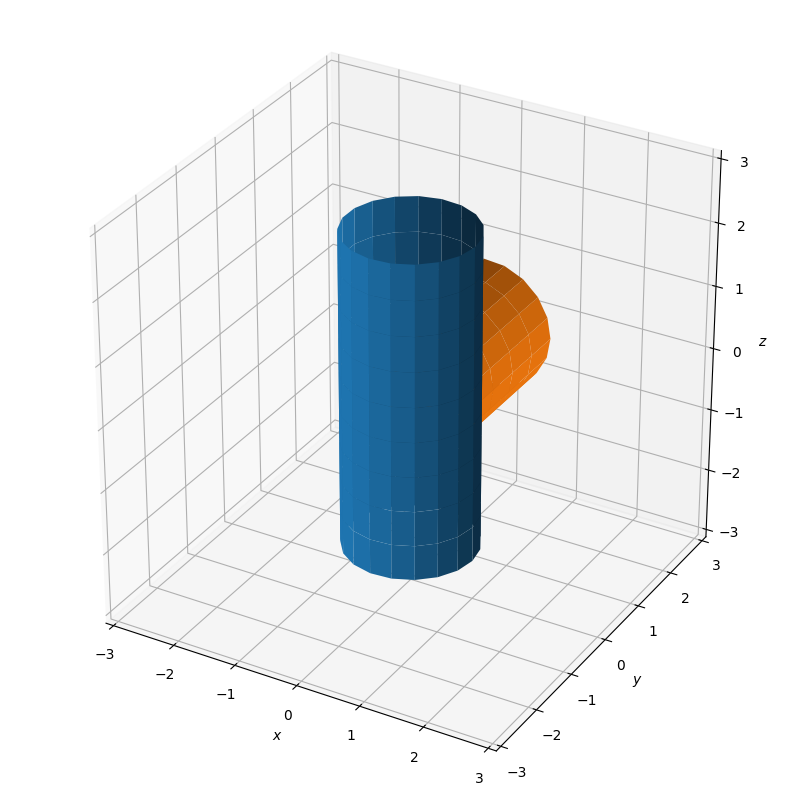

(-3, 3)

In [17]:
theta,z = np.linspace(0,2*np.pi,20),np.linspace(0,1,10)
theta,z = np.meshgrid(theta,z)

rod = np.array([np.cos(theta),np.sin(theta),5*z])

#arrays of shape (3,M,N) that store positions of vertices
rod1 = rod-np.array([0,0,2.5]).reshape((3,1,1))
rod2 = np.array([rod[0,:5],rod[2,:5],rod[1,:5]])

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig) #create Axes3D object to display the plot
ax.plot_surface(*rod1)
ax.plot_surface(*rod2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

In this crude approximation, assume there is a particle of mass $m=1$ at each vertex. Calculate the moment of inertia tensor $I_{ij} = \sum m(r^2\delta_{ij}-r_ir_j)$ (where the sum is taken over the particles of mass $m$ at position $\mathbf r$). By construction, we expect it to be roughly diagonal in this basis. If it is not, diagonalise it (hint: `numpy.linalg.eig`). Note the principal moments.

In [ ]:
#Write your answer here

### 1q. 

Use `plot_trajectories()` to visualise the trajectory assuming $\boldsymbol\omega$ starts very close to the relevant moment. (Remember you are plotting only one trajectory, so need to give it a list containing one list of angular velocity vectors.)

In [ ]:
#Write your answer here

### 1r. 

Now let's transform to an inertial reference frame, i.e. one that isn't fixed on the body, and denote quantities in this lab frame using primes ('). Let's define the rotation between the two frames to be $R(t)$ according to $\mathbf x'=R\cdot\mathbf x$ for any vector $\mathbf x$. Show that $$\dot R_{ij}=R_{ik}\epsilon_{klj}\omega_l.$$ (Hint: what is $\dot{\mathbf x'}$ for $\mathbf x$ fixed in the body frame?)

Write your answer here

### 1s. 

Use your answer above to implement the following function which computes $R$ given $\boldsymbol\omega$ at times $t_i$. (Hint: `numpy.einsum()`)

In [ ]:
eijk = np.zeros((3, 3, 3))
eijk[0, 1, 2] = eijk[1, 2, 0] = eijk[2, 0, 1] = 1
eijk[0, 2, 1] = eijk[2, 1, 0] = eijk[1, 0, 2] = -1

def rotations(times, omegas):
    """
    times: array (N,)
    omegas: angular velocities at times, array (N,3)
    returns: total rotation matrices (starting from identity) at times, array (N,3,3)
    """
    rots = #compute rotations
    return rots

### 1t. 

Recall that any 3-d rotation is equavent to a 2-d rotation around an axis. Show that $\rm{tr}(R)=1+2\cos\theta$, where $\theta$ is the total angle of rotation. (Hint: recall that the trace is basis-independent, so you might consider using the rotation axis as a basis vector.)

Write your answer here

### 1u. 

Use your function to compute the rotation matrices corresponding to the specific trajectory you plotted. Using the property you just proved, find and plot the total rotation angle over time. Compare your results to the video.

In [ ]:
#Write your answer here

### 1v. 

Use the following cell to visualise the actual rotation of the object, using your computed trajectories and rotations. Compare the result to the video.

<IPython.core.display.Javascript object>


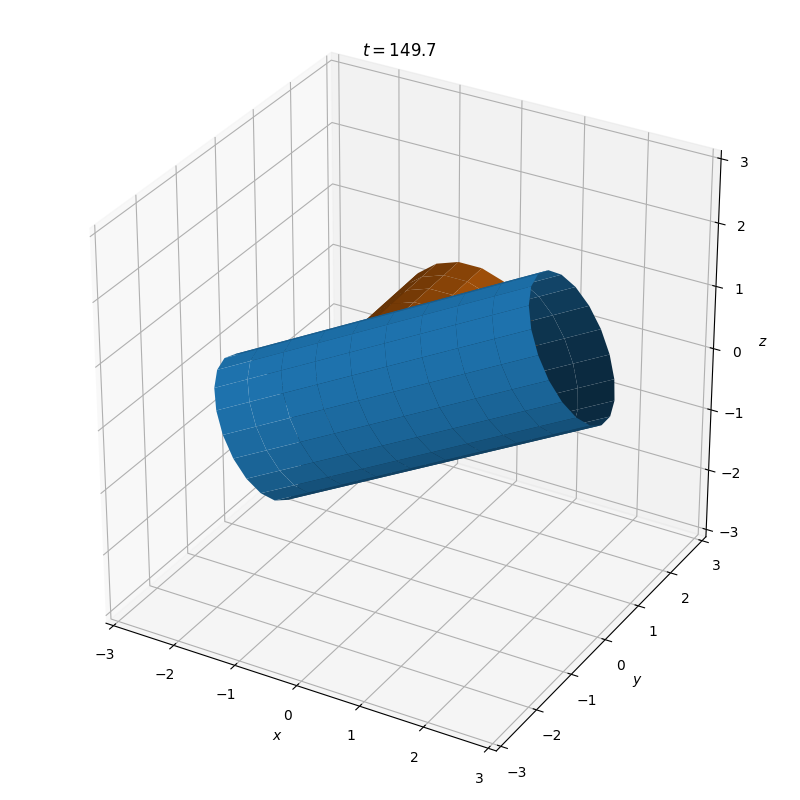

(-3, 3)

In [23]:
def animate_t_junction(fig, ax, times, omegas, rots, I, N=500):
    """
    fig: figure object on which to plot
    ax: Axes3D object on which to plot
    times: times at which we have data, array (N,)
    omegas: body-frame angular velocity vectors at times, array (N,3)
    rots: rotation matrices at times, array (N,3,3)
    I: principal moments of inertia, array (3,)
    N: number of frames to update, scalar
    plots object as function of time, angular momentum in red, angular veolcity as blue
    """
    for i in range(N):
        i = i*len(times)//N
        r = rots[i]
        ax.clear()
        ax.plot_surface(*np.einsum("lk,kij->lij",r,rod1))
        ax.plot_surface(*np.einsum("lk,kij->lij",r,rod2))
        om = r.dot(omegas[i])
        om = 3*om/np.sum(om**2)**.5 #normalised omega
        ax.quiver(0,0,0,*om)
        L = r.dot(I*omegas[i])
        L = 3*L/np.sum(L**2)**.5 #normalised L
        ax.quiver(0,0,0,*L,color="r")
        ax.set_title("$t=%.1f$"%times[i])
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")
        ax.set_zlabel("$z$")
        ax.set_xlim(-3,3)
        ax.set_ylim(-3,3)
        ax.set_zlim(-3,3)
        fig.canvas.draw()
        
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig) #create Axes3D object to display the plot
ax.plot_surface(*rod1)
ax.plot_surface(*rod2)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

In [ ]:
animate_t_junction(fig, ax, times, omegas, rots, I)

# (Additional Visualizations, Not for Credit)

### 1w 

Now consider the following model of a coin. Try using different initial angular velocities and model its rotation. Try throwing a coin in the air and compare the motion. Don't use this crude model to calculate the moments of inertia, calculate it analytically (assume the coin's thickness is small compared to the radius).

<IPython.core.display.Javascript object>


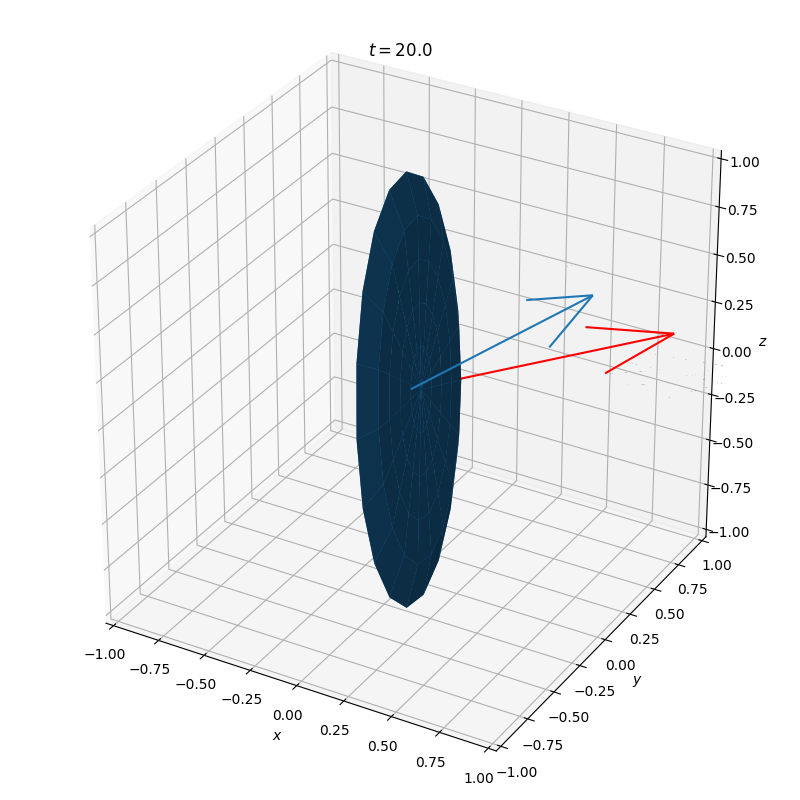

(-1, 1)

In [25]:
r,theta = np.linspace(0,2,11),np.linspace(0,2*np.pi,20)
r,theta = np.meshgrid(r,theta)

x = np.zeros(r.shape)
x[r>1] = -0.05
x[r<1] = 0.05
r = np.minimum(r,2-r)
y = r*np.cos(theta)
z = r*np.sin(theta)

coin = np.array([x,y,z])

def animate_coin(fig, ax, times, omegas, rots, I, N=500):
    """
    same conventions as animate_t_junction
    """
    N=500
    for i in range(N):
        i = i*len(times)//N
        r = rots[i]
        ax.clear()
        ax.plot_surface(*np.einsum("lk,kij->lij",r,coin))
        om = r.dot(omegas[i])
        om = 1.5*om/np.sum(om**2)**.5 #normalised omega
        ax.quiver(0,0,0,*om)
        L = r.dot(I*omegas[i])
        L = 1.5*L/np.sum(L**2)**.5 #normalised L
        ax.quiver(0,0,0,*L,color="r")
        ax.set_title("$t=%.1f$"%times[i])
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")
        ax.set_zlabel("$z$")
        ax.set_xlim(-1,1)
        ax.set_ylim(-1,1)
        ax.set_zlim(-1,1)
        fig.canvas.draw()

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig) #create Axes3D object to display the plot
ax.plot_surface(*coin)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

### 1x. 

In the previous questions, we assumed that objects rotate freely in zero-gravity, e.g. on the ISS. We also assumed that they rotate freely in the presence of gravity when thrown in the air. However, they don't rotate freely in the presence of gravity when, e.g. resting on a table. What exactly does it mean for something to rotate freely, and where does this difference in behaviour come from?

Write your answer here